In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## data collection and pre_processing

In [5]:
df = pd.read_csv("CarPrice_data.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [15]:
correlation_matrix = df.corr()
print(correlation_matrix)

ValueError: could not convert string to float: 'alfa-romero giulia'

In [11]:
## checking the distributon of categorical variables
print(df.fueltype.value_counts())
print(df.doornumber.value_counts())
print(df.doornumber.value_counts())
print(df.carbody.value_counts())
print(df.drivewheel.value_counts())
print(df.enginetype.value_counts())
print(df.cylindernumber.value_counts())


fueltype
gas       185
diesel     20
Name: count, dtype: int64
doornumber
four    115
two      90
Name: count, dtype: int64
doornumber
four    115
two      90
Name: count, dtype: int64
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64


categorical encoding

In [14]:
df.replace({'fueltype':{"gas":1,"diesel":2}},inplace = True)
df.replace({"doornumber":{"two":2, "four":4}}, inplace = True)
df.replace ({"carbody":{"sedan":1,"convertible":2,"hatchback":3,"wagon":4,"hardtop":5}},inplace = True)
df.replace({"drivewheel":{"fwd":1,"rwd":2,"4wd":3}},inplace = True)
df.replace({"enginetype":{"ohc":1,"ohcf":2,"ohcv":3,"dohc":4,"l":5,"rotor":6,"dohcv":7}},inplace = True)
df.replace({"cylindernumber":{"two":2,"three":3,"four":4,"five":5,"six":6,"eight":8,"twelve":12}},inplace = True)

C:\Users\ebi\AppData\Local\Temp\ipykernel_10560\1379105620.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'fueltype':{"gas":1,"diesel":2}},inplace = True)
C:\Users\ebi\AppData\Local\Temp\ipykernel_10560\1379105620.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"doornumber":{"two":2, "four":4}}, inplace = True)
C:\Users\ebi\AppData\Local\Temp\ipykernel_10560\1379105620.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old beh

In [16]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,std,2,2,2,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,std,2,2,2,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,std,2,3,2,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,std,4,1,1,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,std,4,1,3,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# splitting the data and target

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [22]:
x = df[['fueltype',"doornumber","carbody","drivewheel","wheelbase","curbweight",'enginetype',"cylindernumber","enginesize",'stroke',"horsepower","peakrpm",'citympg',"highwaympg"]]
y = df["price"]

# splitting training and test data

In [24]:
x_train, x_test,y_train, y_test = train_test_split(x,y ,test_size = 0.1, random_state = 2)

# model training

In [25]:
lin_reg_model = LinearRegression()

In [26]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

# model Evaluation

In [27]:
# prediction on traing data
training_data_prediction = lin_reg_model.predict(x_train)

In [29]:
# finding r_squre error
error_score = metrics.r2_score(y_train, training_data_prediction)
print(error_score)

0.857055614837962


visualizing the actual prices and predicted prices

AttributeError: module 'matplotlib.pyplot' has no attribute 'tittle'

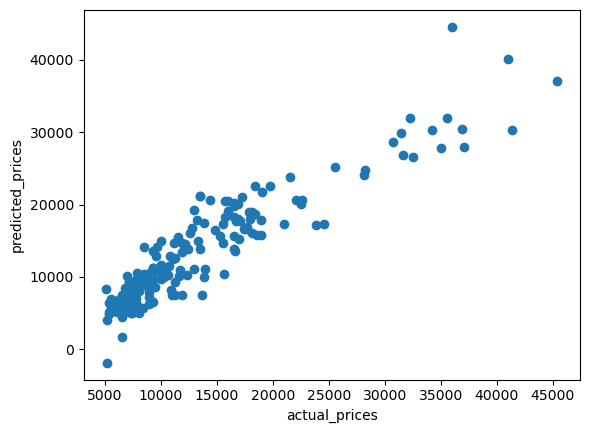

In [32]:
pyplot.scatter(x= y_train, y = training_data_prediction)
pyplot.xlabel('actual_prices')
pyplot.ylabel('predicted_prices')
pyplot.tittle("actual prices vs pridicted prices")
pyplot.show()

# test data prediction

In [34]:
test_data_prediction = lin_reg_model.predict(x_test)

In [35]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print(error_score)

0.8125241940054737


AttributeError: module 'matplotlib.pyplot' has no attribute 'tittle'

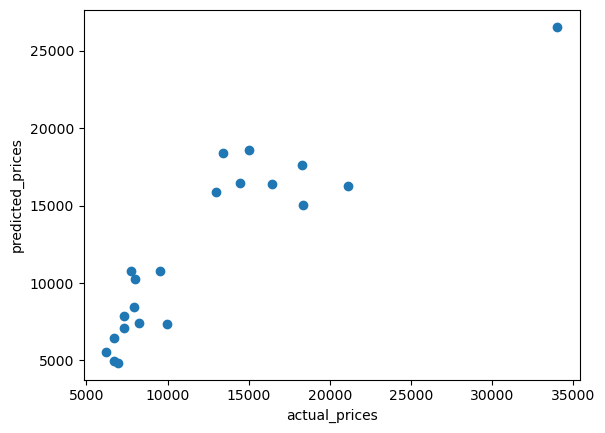

In [37]:
pyplot.scatter(x= y_test,y= test_data_prediction)
pyplot.xlabel('actual_prices')
pyplot.ylabel('predicted_prices')
pyplot.tittle("actual prices vs pridicted prices")
pyplot.show()